<a href="https://colab.research.google.com/github/shravankumar147/tutorials/blob/master/pyspark_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!which python

/usr/local/bin/python


In [0]:
!pip freeze

absl-py==0.8.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.2.0
astor==0.8.0
astropy==3.0.5
atari-py==0.2.6
atomicwrites==1.3.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.10.14
botocore==1.13.14
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.9.11
cffi==1.13.2
chainer==6.5.0
chardet==3.0.4
chart-studio==1.0.0
Click==7.0
cloudpickle==1.2.2
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.0
cupy-cuda100==6.5.0
cvxopt==1.2.3
cvxpy==1.0.25
cycler==0.10.0
cymem==2.0.2
Cython==0.29.14
daft==0.0.4
dask==1.1.5
dataclasses==0.7
datascience==0.10.6
decorator==4.4.1
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.1.1
distributed==1.25.3
Django==2.2.7
dlib==19.16.0
dm-sonnet==1.35
docopt==0.6.

In [0]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 71kB/s 
     |████████████████████████████████| 204kB 43.0MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=99ee8a9d072e41a8567492ef5f453fb9161cdd9350e791a02fddacbc7b584a5b
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [0]:
!pip install findspark

In [0]:
!ls /content/

sample_data


In [0]:
!pip show pyspark

Name: pyspark
Version: 2.4.4
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: http://www.apache.org/licenses/LICENSE-2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: py4j
Required-by: 


In [0]:
!ls /usr/local/lib/python3.6/dist-packages/pyspark/python

lib  pyspark


In [0]:
!ls /usr/lib/jvm/

default-java		   java-11-openjdk-amd64     java-8-openjdk-amd64
java-1.11.0-openjdk-amd64  java-1.8.0-openjdk-amd64


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/usr/local/lib/python3.6/dist-packages/pyspark"

In [0]:
import findspark
findspark.init("/usr/local/lib/python3.6/dist-packages/pyspark")

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
#print(os.listdir('./sample_data'))
file_loc = "./sample_data/california_housing_train.csv"
df_spark = spark.read.csv(file_loc, inferSchema=True, header=True)
print(type(df_spark))

<class 'pyspark.sql.dataframe.DataFrame'>


In [0]:
df_spark.printSchema() # print detail schema of data
df_spark.show()# show top 20 rows

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|     

In [0]:
# !curl https://github.com/h2oai/h2o-2/blob/master/smalldata/BostonHousing.csv -o BostonHousing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  331k    0  331k    0     0   209k      0 --:--:--  0:00:01 --:--:--  208k


In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [0]:
dataset.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [0]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [0]:
from pyspark.sql import functions as F

In [0]:
dataset = dataset.withColumn("medv", F.col("medv")>20).withColumn("medv", F.when(F.col("medv")=='false', 0).otherwise(1))

In [0]:
inputCols=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
outputCol = 'Attributes'

In [0]:
#Input all the features in one vector column
assembler = VectorAssembler(inputCols=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'], outputCol = 'Attributes')
output = assembler.transform(dataset)
#Input vs Output
finalized_data = output.select("Attributes","medv")
finalized_data.show()

+--------------------+----+
|          Attributes|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|   1|
|[0.02731,0.0,7.07...|   1|
|[0.02729,0.0,7.07...|   1|
|[0.03237,0.0,2.18...|   1|
|[0.06905,0.0,2.18...|   1|
|[0.02985,0.0,2.18...|   1|
|[0.08829,12.5,7.8...|   1|
|[0.14455,12.5,7.8...|   1|
|[0.21124,12.5,7.8...|   0|
|[0.17004,12.5,7.8...|   0|
|[0.22489,12.5,7.8...|   0|
|[0.11747,12.5,7.8...|   0|
|[0.09378,12.5,7.8...|   1|
|[0.62976,0.0,8.14...|   1|
|[0.63796,0.0,8.14...|   0|
|[0.62739,0.0,8.14...|   0|
|[1.05393,0.0,8.14...|   1|
|[0.7842,0.0,8.14,...|   0|
|[0.80271,0.0,8.14...|   1|
|[0.7258,0.0,8.14,...|   0|
+--------------------+----+
only showing top 20 rows



In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

dtree = DecisionTreeClassifier(featuresCol="Attributes",
                               labelCol="medv",
                               maxDepth=3,
                               maxBins=50)

In [0]:
# output = assembler.transform(dataset)
dtree_model = dtree.fit(finalized_data)

In [0]:
model_path = "dtree_model_01"
dtree_model.save(model_path)

In [0]:
from pyspark.ml.classification import DecisionTreeClassificationModel

In [0]:
dtree_model = DecisionTreeClassificationModel.load(model_path)

In [0]:
print(dtree_model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_061e1d820c65) of depth 3 with 13 nodes
  If (feature 12 <= 14.23)
   If (feature 5 <= 6.0440000000000005)
    If (feature 7 <= 4.7833000000000006)
     Predict: 1.0
    Else (feature 7 > 4.7833000000000006)
     Predict: 0.0
   Else (feature 5 > 6.0440000000000005)
    Predict: 1.0
  Else (feature 12 > 14.23)
   If (feature 9 <= 298.0)
    If (feature 6 <= 94.45)
     Predict: 1.0
    Else (feature 6 > 94.45)
     Predict: 0.0
   Else (feature 9 > 298.0)
    If (feature 6 <= 57.3)
     Predict: 1.0
    Else (feature 6 > 57.3)
     Predict: 0.0



In [0]:
def _get_root_node(tree: DecisionTreeClassificationModel):
    return tree._call_java('rootNode')

def get_impurities(tree: DecisionTreeClassificationModel):
    def recur(node):
        if node.numDescendants() == 0:
            return []
        ni = node.impurity()
        return (
            recur(node.leftChild()) + [ni] + recur(node.rightChild())
        )
    return recur(_get_root_node(tree))    


In [0]:

def get_node_info(tree: DecisionTreeClassificationModel):
    def recur(node):
        if node.numDescendants() == 0:
            return []
        print(f"numDescendants: {node.numDescendants()}")
        print(f"Root Node::{node.toString()}")
        print(f"Left Child::{node.leftChild().toString()}")
        print(f"Right Child::{node.rightChild().toString()}")
        return (
            recur(node.leftChild()) + recur(node.rightChild())
        )
    return recur(_get_root_node(tree))        

In [0]:
get_node_info(dtree_model)

numDescendants: 12
Root Node::InternalNode(prediction = 1.0, impurity = 0.4887203362027215, split = org.apache.spark.ml.tree.ContinuousSplit@94485d34)
Left Child::InternalNode(prediction = 1.0, impurity = 0.28187395214144173, split = org.apache.spark.ml.tree.ContinuousSplit@d888359a)
Right Child::InternalNode(prediction = 0.0, impurity = 0.21253471802922358, split = org.apache.spark.ml.tree.ContinuousSplit@490a000)
numDescendants: 4
Root Node::InternalNode(prediction = 1.0, impurity = 0.28187395214144173, split = org.apache.spark.ml.tree.ContinuousSplit@d888359a)
Left Child::InternalNode(prediction = 1.0, impurity = 0.4973230220107079, split = org.apache.spark.ml.tree.ContinuousSplit@e89cf1dd)
Right Child::LeafNode(prediction = 1.0, impurity = 0.13062632333856983)
numDescendants: 2
Root Node::InternalNode(prediction = 1.0, impurity = 0.4973230220107079, split = org.apache.spark.ml.tree.ContinuousSplit@e89cf1dd)
Left Child::LeafNode(prediction = 1.0, impurity = 0.44855820576717703)
Righ

[]

In [0]:
 root = _get_root_node(dtree_model)

In [0]:
dir(root)

['deepCopy',
 'equals',
 'fromOld',
 'gain',
 'getClass',
 'hashCode',
 'impurity',
 'impurityStats',
 'leftChild',
 'maxSplitFeatureIndex',
 'notify',
 'notifyAll',
 'numDescendants',
 'predictImpl',
 'prediction',
 'rightChild',
 'split',
 'subtreeDepth',
 'subtreeToString',
 'subtreeToString$default$1',
 'toOld',
 'toString',
 'wait']

In [0]:
# Get type of node using below methods

In [0]:
root.leftChild().leftChild().toString()

'InternalNode(prediction = 1.0, impurity = 0.4973230220107079, split = org.apache.spark.ml.tree.ContinuousSplit@e89cf1dd)'

In [0]:
root.maxSplitFeatureIndex()

12

In [0]:
root.leftChild().numDescendants()

4

In [0]:
root.leftChild().leftChild().leftChild().toString()

'LeafNode(prediction = 1.0, impurity = 0.44855820576717703)'

In [0]:
root.leftChild().leftChild().split().toString()

'org.apache.spark.ml.tree.ContinuousSplit@e89cf1dd'

In [0]:
from pyspark.mllib.util import MLUtils

import json
from bson import json_util
from bson.json_util import dumps
# Parser
def parse(lines):
    block = []
    while lines :
        
        if lines[0].startswith('If'):
            bl = ' '.join(lines.pop(0).split()[1:]).replace('(', '').replace(')', '')
            block.append({'name':bl, 'children':parse(lines)})
            
            
            if lines[0].startswith('Else'):
                be = ' '.join(lines.pop(0).split()[1:]).replace('(', '').replace(')', '')
                block.append({'name':be, 'children':parse(lines)})
        elif not lines[0].startswith(('If','Else')):
            block2 = lines.pop(0)
            block.append({'name':block2})
        else:
            break	
    return block

# Convert Tree to JSON
def tree_json(tree):
    data = []
    for line in tree.splitlines() : 
        if line.strip():
            line = line.strip()
            data.append(line)
        else : break
        if not line : break
    res = []
    res.append({'name':'Root', 'children':parse(data[1:])})
    with open('structure.json', 'w') as outfile:
        json.dump(res[0], outfile)
    # print ('Conversion Success !')
    return json.dumps(res[0])


In [0]:
from collections import OrderedDict
from json import loads, dumps
from pyspark import SparkContext

def generate_color_brew(n):
    """
    Generates an evenly distributed range
    of hue values in the HSV colour scale.

    Arguments:
    n -- an int with the number of hue values
         you want to obtain

    Returns:
    a python list with those hue values
    """
    hue_step = 360 / float(n)
    return [color * hue_step / 360.0 for color in range(n)]


def node_to_str(node, featureNames, categoryNames, classNames, numClasses, 
                nodeList, filled, round_leaves, colorBrew):
    """
    Generates a DOT-compatible string for a given tree node.
    Note that this function has side-effects, as node properties
    will be written to the nodeList argument without being
    explicitly returned (in fact, those side-effects are the
    key part of this function).

    This function is not meant to be used directly.

    Arguments:
    node -- a tree node (Python dict) as parsed from the JSON format

    featureNames -- a list with the feature names. This
                    is probably the same list you usually
                    pass to your VectorAssembler constructor

    categoryNames -- a dictionary with the featureNames that
                     are categorical as the keys, and the
                     different categories as the values.
                     This is probably the featureNames as key,
                     StringIndexerModel.labels attribute as value
                     for each categorical feature

    classNames -- a list with the class names for your target
                  column. This is probably the StringIndexerModel.labels
                  for your target column

    numClasses -- internal argument, obtained from the function
                  get_num_classes

    nodeList -- list that captures the side-effects for this function.
                It captures the node attributes

    filled -- boolean which indicates whether to fill nodes with colour
              or not. Color gamma will be the prediction class for each
              node, and color intensity the impurity at such node

    round_leaves -- boolean which indicates whether to represent leaf
                    nodes as ellipses rather than rectangles

    colorBrew -- list of hue values as generated by generate_color_brew()

    Returns:
    Just the node id as a string. The rest of the functionality
    are side-effects, inserted into nodeList
    """
    # classNames preparation:
    if classNames is None:
        class_name = node["prediction"]
        class_name_str = "Class #" + str(int(node["prediction"]))
    else:
        class_names = dict(enumerate(classNames))
        class_name = class_names[node["prediction"]]
        class_name_str = str(class_name)
    
    attributes = []

    # Names preparation (featureNames, categoryNames):
    if node["nodeType"] == "internal":
        
        if featureNames is None:
            feature_name = node["featureIndex"]
            feature_name_str = "Feature #" + str(feature_name)
        else:
            featureNames = dict(enumerate(featureNames))
            feature_name = featureNames[node["featureIndex"]]
            feature_name_str = str(feature_name)
        
        if categoryNames is None:
            if node["splitType"] == "categorical":
                list_of_categories_5_by_5 = []
                for i in range(0, len(node["leftCategories"]), 5):
                    list_of_categories_5_by_5.append(",".join([str(j) for j in node["leftCategories"][i:i+5]]))
                categories = "categories# " + "{" + "\\n".join(str(n) for n in list_of_categories_5_by_5) + "}"
        else:
            if node["splitType"] == "categorical":
                try:
                    category_names = dict(enumerate(categoryNames[feature_name]))
                    list_of_categories_5_by_5 = []
                    for i in range(0, len(node["leftCategories"]), 5):
                        list_of_categories_5_by_5.append(",".join([category_names[j] for j in node["leftCategories"][i:i+5]]))
                    categories = "{" + "\\n".join(n for n in list_of_categories_5_by_5) + "}"
                except KeyError:
                    list_of_categories_5_by_5 = []
                    for i in range(0, len(node["leftCategories"]), 5):
                        list_of_categories_5_by_5.append(",".join([str(j) for j in node["leftCategories"][i:i+5]]))
                    categories = "categories# " + "{" + "\\n".join(str(n) for n in list_of_categories_5_by_5) + "}"

        # For continuous split:
        if node["splitType"] == "continuous":
            label = """ label="Node ID %s\\n%s <= %.4f\\nImpurity = %.4f\\nGain = %.4f\\nPrediction = %s" """ % (node["id"],
                                                                                                                 feature_name_str,
                                                                                                                 node["threshold"],
                                                                                                                 node["impurity"],
                                                                                                                 node["gain"],
                                                                                                                 class_name_str
                                                                                                                )
        # For categorical split:
        else:
            label = """ label="Node ID %s\\n%s in %s\\nImpurity = %.4f\\nGain = %.4f\\nPrediction = %s" """ % (node["id"],
                                                                                                               feature_name_str,
                                                                                                               categories,
                                                                                                               node["impurity"],
                                                                                                               node["gain"],
                                                                                                               class_name_str
                                                                                                              )
    # Leaf node:
    else:
        label = """ label="Node ID %s\\nImpurity = %.4f\\nPrediction = %s" """ % (node["id"],
                                                                                  node["impurity"],
                                                                                  class_name_str
                                                                                 )
        if round_leaves is True:
            attributes.append("shape=ellipse")
            #nodeList.append(graph_string + "[shape=ellipse]") # Change leaf shape
    
    attributes.append(label)

    # Color adding:
    if filled is True:
        h = colorBrew[int(node["prediction"])]
        s = 1.0 - node["impurity"]
        attributes.append('fillcolor="%.4f,%.4f,%.4f"' % (h,s,1.0))
        #nodeList.append(graph_string + ' [fillcolor="%.4f,%.4f,%.4f"]' % (h,s,1.0))

    nodeList.append("%s [%s]" % (node["id"],
                                 ",".join(attributes)))

    return str(node["id"])

def get_num_classes(node):
    """
    Gets the number of different classes that 
    the tree predicts.

    Arguments:
    node --  the root node for the tree

    Returns:
    the number of classes, as an integer
    """
    nodes_to_explore = [node]
    classes = set()
    while len(nodes_to_explore) > 0:
        if len(nodes_to_explore) == 0:
            break
        current_node = nodes_to_explore.pop()
        classes.add(current_node["prediction"])
        
        if current_node["nodeType"] == "internal":
            nodes_to_explore.append(current_node["leftChild"])
            nodes_to_explore.append(current_node["rightChild"])
    return int(max(list(classes)) + 1)

def add_node_ids(node):
    """
    Adds node IDs to the tree (the recursive Python dict)
    in a breadth-first fasion.

    Arguments:
    node --  the root node for the tree

    Returns:
    the same tree (Python dict), but with a new key for
    each node (the ID)
    """
    nodes_to_explore = [node]
    counter = -1
    while len(nodes_to_explore) > 0:
        if len(nodes_to_explore) == 0:
            break
        current_node = nodes_to_explore.pop(0)
        counter += 1
        current_node["id"] = counter
        #classes.add(current_node["prediction"])
        
        if current_node["nodeType"] == "internal":
            nodes_to_explore.append(current_node["leftChild"])
            nodes_to_explore.append(current_node["rightChild"])
    return node

def relations_to_str(node, featureNames=None, categoryNames=None, classNames=None, 
                     numClasses=None, nodeList=None, filled=True, roundLeaves=True,
                     color_brew=None):
    """
    Generates the DOT-compatible strings to create the tree
    structure.

    This function is not meant to be used directly.

    Arguments:
    node -- a tree node (Python dict) as parsed from the JSON format

    featureNames -- a list with the feature names. This
                    is probably the same list you usually
                    pass to your VectorAssembler constructor

    categoryNames -- a dictionary with the featureNames that
                     are categorical as the keys, and the
                     different categories as the values.
                     This is probably the featureNames as key,
                     StringIndexerModel.labels attribute as value 
                     for each categorical feature

    classNames -- a list with the class names for your target
                  column. This is probably the StringIndexerModel.labels
                  for your target column

    numClasses -- internal argument, obtained from the function
                  get_num_classes

    nodeList -- list that captures the side-effects for the node_to_string function.
                It captures the node attributes

    filled -- boolean which indicates whether to fill nodes with colour
              or not. Color gamma will be the prediction class for each
              node, and color intensity the impurity at such node

    roundLeaves -- boolean which indicates whether to represent leaf
                    nodes as ellipses rather than rectangles

    color_brew -- list of hue values as generated by generate_color_brew()

    Returns:
    A Python list of strings with the relationships in DOT format
    """
    nodes_to_explore = [node]
    relations = []
    while len(nodes_to_explore) > 0:
        if len(nodes_to_explore) == 0:
            break
        current_node = nodes_to_explore.pop()
        if current_node["nodeType"] == "leaf":
            continue
        relations.append(node_to_str(current_node, featureNames, categoryNames, 
                                     classNames, numClasses, nodeList, filled, roundLeaves, color_brew) 
                         + "->" 
                         + node_to_str(current_node["leftChild"], featureNames, categoryNames, 
                                       classNames, numClasses, nodeList, filled, roundLeaves, color_brew) 
                         + '[labeldistance=2.5, labelangle=45., headlabel="True"]' 
                         + "\n")
        nodes_to_explore.append(current_node["leftChild"])
        
        relations.append(node_to_str(current_node, featureNames, categoryNames, 
                                     classNames, numClasses, nodeList, filled, roundLeaves, color_brew) 
                         + "->" 
                         + node_to_str(current_node["rightChild"], featureNames, categoryNames, 
                                       classNames, numClasses, nodeList, filled, roundLeaves, color_brew) 
                         + '[labeldistance=2.5, labelangle=-45., headlabel="False"]' 
                         + "\n")
        nodes_to_explore.append(current_node["rightChild"])
    return relations

def generate_tree_json(DecisionTreeClassificationModel, withNodeIDs=False):
    """
    Creates a recursive JSON string with the tree structure of a Spark's fitted
    DecisionTreeClassificationModel. Each node is defined by its attributes 
    (such as split rule, impurity...), and also its children, which are also 
    nodes with their own attributes and children (unitl a leaf node is reached).

    This JSON is meant to be used to plot the tree with whatever plotting
    library which is compatible with the JSON format.

    Arguments:
    DecisionTreeClassificationModel -- a pyspark.ml.classification.DecisionTreeClassificationModel
                                       instance
    
    withNodeIDs -- boolean that indicates whether to add IDs (increasing in breadth-first
                   fashion) to the tree nodes

    Returns:
    a JSON string with the formatted tree
    """
    sc = SparkContext.getOrCreate()

    json_tree = sc._jvm.com.vfive.spark.ml.SparkMLTree(DecisionTreeClassificationModel._java_obj).toJsonPlotFormat()

    if withNodeIDs:
        json_tree = dumps(add_node_ids(loads(json_tree, object_pairs_hook=OrderedDict)), indent=2)

    return json_tree

def export_graphviz(DecisionTreeClassificationModel, featureNames=None, categoryNames=None, classNames=None,
                   filled=True, roundedCorners=True, roundLeaves=True):
    """
    Generates a DOT string out of a Spark's fitted DecisionTreeClassificationModel, which
    can be drawn with any library capable of handling the DOT format.

    If you want to plot in a single step, please use the function plot_tree().

    Arguments:
    DecisionTreeClassificationModel -- a pyspark.ml.classification.DecisionTreeClassificationModel
                                       instance

    featureNames -- a list with the feature names. This
                    is probably the same list you usually
                    pass to your VectorAssembler constructor

    categoryNames -- a dictionary with the featureNames that
                     are categorical as the keys, and the
                     different categories as the values.
                     This is probably the featureNames as key,
                     StringIndexerModel.labels attribute as value
                     for each categorical feature

    classNames -- a list with the class names for your target
                  column. This is probably the StringIndexerModel.labels
                  for your target column

    filled -- boolean which indicates whether to fill nodes with colour
              or not. Color gamma will be the prediction class for each
              node, and color intensity the impurity at such node

    roundedCorners -- boolean which indicates whether to round 
                      rectangle corners for the nodes

    roundLeaves -- boolean which indicates whether to represent leaf
                    nodes as ellipses rather than rectangles

    Returns:
    a DOT string ready to be processed by any DOT handling library
    """
    tree_dict = loads(generate_tree_json(DecisionTreeClassificationModel, withNodeIDs=False))
    num_classes = get_num_classes(tree_dict)
    color_brew = generate_color_brew(num_classes)
    node_list = []
    tree_dict_with_id = add_node_ids(tree_dict)

    graph = relations_to_str(tree_dict_with_id,
                             featureNames=featureNames, 
                             categoryNames=categoryNames, 
                             classNames=classNames, 
                             numClasses=num_classes,
                             nodeList=node_list,
                             filled=filled,
                             roundLeaves=roundLeaves,
                             color_brew=color_brew)
    node_properties = "\n".join(node_list)
    filled_and_rounded = []
    if filled:
        filled_and_rounded.append("filled")
    if roundedCorners:
        filled_and_rounded.append("rounded")
    dot_string = """digraph Tree {
                    node [shape=box style="%s"]
                    subgraph body {
                    %s
                    %s}
                    }""" % (",".join(filled_and_rounded), "".join(graph), node_properties)
    return dot_string


def plot_tree(DecisionTreeClassificationModel, featureNames=None, categoryNames=None, classNames=None,
              filled=True, roundedCorners=True, roundLeaves=True):
    """
    Draws a Spark's fitted DecisionTreeClassificationModel in png format. If you are
    using Jupyter, this function can be easily used alongside Ipython.display in order
    to draw a tree in Jupyter:

        from spark_tree_plotting import plot_tree
        from IPython.display import Image

        Image(plot_tree(my_DecisionTreeClassificationModel))

    Note that this function requires pydot3 to be installed.

    Arguments:
    DecisionTreeClassificationModel -- a pyspark.ml.classification.DecisionTreeClassificationModel
                                       instance

    featureNames -- a list with the feature names. This
                    is probably the same list you usually
                    pass to your VectorAssembler constructor

    categoryNames -- a dictionary with the featureNames that
                     are categorical as the keys, and the
                     different categories as the values.
                     This is probably the featureNames as key,
                     StringIndexerModel.labels attribute as value
                     for each categorical feature

    classNames -- a list with the class names for your target
                  column. This is probably the StringIndexerModel.labels
                  for your target column

    filled -- boolean which indicates whether to fill nodes with colour
              or not. Color gamma will be the prediction class for each
              node, and color intensity the impurity at such node

    roundedCorners -- boolean which indicates whether to round 
                      rectangle corners for the nodes

    roundLeaves -- boolean which indicates whether to represent leaf
                    nodes as ellipses rather than rectangles

    Returns:
    a PNG string, which can be displayed in Jupyter/any webpage and/or
    be saved to disk
    """

    try:
        from pydot import graph_from_dot_data
    except ImportError:
        raise ImportError(
            "This function requires pydot3 dot be installed. You can easily install it with pip install pydot3"
            )

    graph = graph_from_dot_data(export_graphviz(DecisionTreeClassificationModel,
                                               featureNames=featureNames,
                                               categoryNames=categoryNames,
                                               classNames=classNames,
                                               filled=filled,
                                               roundedCorners=roundedCorners,
                                               roundLeaves=roundLeaves
                                               )
                               )
    if type(graph) is list:
        plot = graph[0].create_png()
    else:
        plot = graph.create_png()
    return plot
    

In [0]:
tree_dict = {
  "featureIndex":0,
  "gain":0.08681394658400207,
  "impurity":0.6230942824070332,
  "threshold":3050.5,
  "nodeType":"internal",
  "splitType":"continuous",
  "prediction":0.0,
  "leftChild":{
    "featureIndex":0,
    "gain":0.08616165361635758,
    "impurity":0.5539261911259398,
    "threshold":2540.5,
    "nodeType":"internal",
    "splitType":"continuous",
    "prediction":0.0,
    "leftChild":{
      "featureIndex":10,
      "gain":0.04640621444482429,
      "impurity":0.6171371727013576,
      "nodeType":"internal",
      "splitType":"categorical",
      "leftCategories":[
        0.0
      ],
      "rightCategories":[
        1.0,
        2.0,
        3.0
      ],
      "prediction":2.0,
      "leftChild":{
        "impurity":0.18642232564845895,
        "nodeType":"leaf",
        "prediction":0.0
      },
      "rightChild":{
        "impurity":0.5893401621499551,
        "nodeType":"leaf",
        "prediction":2.0
      }
    },
    "rightChild":{
      "impurity":0.4430125702798494,
      "nodeType":"leaf",
      "prediction":0.0
    }
  },
  "rightChild":{
    "impurity":0.5109863148417016,
    "nodeType":"leaf",
    "prediction":1.0
  }
}

In [0]:
tree_dict

{'featureIndex': 0,
 'gain': 0.08681394658400207,
 'impurity': 0.6230942824070332,
 'leftChild': {'featureIndex': 0,
  'gain': 0.08616165361635758,
  'impurity': 0.5539261911259398,
  'leftChild': {'featureIndex': 10,
   'gain': 0.04640621444482429,
   'impurity': 0.6171371727013576,
   'leftCategories': [0.0],
   'leftChild': {'impurity': 0.18642232564845895,
    'nodeType': 'leaf',
    'prediction': 0.0},
   'nodeType': 'internal',
   'prediction': 2.0,
   'rightCategories': [1.0, 2.0, 3.0],
   'rightChild': {'impurity': 0.5893401621499551,
    'nodeType': 'leaf',
    'prediction': 2.0},
   'splitType': 'categorical'},
  'nodeType': 'internal',
  'prediction': 0.0,
  'rightChild': {'impurity': 0.4430125702798494,
   'nodeType': 'leaf',
   'prediction': 0.0},
  'splitType': 'continuous',
  'threshold': 2540.5},
 'nodeType': 'internal',
 'prediction': 0.0,
 'rightChild': {'impurity': 0.5109863148417016,
  'nodeType': 'leaf',
  'prediction': 1.0},
 'splitType': 'continuous',
 'threshold

In [0]:
num_classes = get_num_classes(tree_dict)
color_brew = generate_color_brew(num_classes)
node_list = []
tree_dict_with_id = add_node_ids(tree_dict)
filled=True
roundedCorners = roundLeaves=True
graph = relations_to_str(tree_dict_with_id,
                            featureNames=inputCols, 
                            categoryNames=None, 
                            classNames=None, 
                            numClasses=num_classes,
                            nodeList=node_list,
                            filled=True,
                            roundLeaves=True,
                            color_brew=color_brew)
node_properties = "\n".join(node_list)
filled_and_rounded = []
if filled:
    filled_and_rounded.append("filled")
if roundedCorners:
    filled_and_rounded.append("rounded")
dot_string = """digraph Tree {
                node [shape=box style="%s"]
                subgraph body {
                %s
                %s}
                }""" % (",".join(filled_and_rounded), "".join(graph), node_properties)

In [0]:
dot_string

'digraph Tree {\n                node [shape=box style="filled,rounded"]\n                subgraph body {\n                0->1[labeldistance=2.5, labelangle=45., headlabel="True"]\n0->2[labeldistance=2.5, labelangle=-45., headlabel="False"]\n1->3[labeldistance=2.5, labelangle=45., headlabel="True"]\n1->4[labeldistance=2.5, labelangle=-45., headlabel="False"]\n3->5[labeldistance=2.5, labelangle=45., headlabel="True"]\n3->6[labeldistance=2.5, labelangle=-45., headlabel="False"]\n\n                0 [ label="Node ID 0\\ncrim <= 3050.5000\\nImpurity = 0.6231\\nGain = 0.0868\\nPrediction = Class #0" ,fillcolor="0.0000,0.3769,1.0000"]\n1 [ label="Node ID 1\\ncrim <= 2540.5000\\nImpurity = 0.5539\\nGain = 0.0862\\nPrediction = Class #0" ,fillcolor="0.0000,0.4461,1.0000"]\n0 [ label="Node ID 0\\ncrim <= 3050.5000\\nImpurity = 0.6231\\nGain = 0.0868\\nPrediction = Class #0" ,fillcolor="0.0000,0.3769,1.0000"]\n2 [shape=ellipse, label="Node ID 2\\nImpurity = 0.5110\\nPrediction = Class #1" ,fill

In [0]:
try:
    from pydot import graph_from_dot_data
except ImportError:
    raise ImportError(
        "This function requires pydot3 dot be installed. You can easily install it with pip install pydot3"
        )

graph = graph_from_dot_data(dot_string)
if type(graph) is list:
    plot = graph[0].create_png()
else:
    plot = graph.create_png()

In [0]:
plot

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03#\x00\x00\x02K\x08\x06\x00\x00\x00\xf4\x03IF\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddw|\xcd\xf7\xf7\xc0\xf1\xd7Mror3$B"1\x82\x88\xda\xabVc\xd4,J\xa9\x11[\x87j\xcdTU\xad\x16\xb5\xbe\xf6\xa6%Uj\x8f$Vj\xef\x8a\x19\xd4\xdeA%\xb1"2e\xde{s\xef\xef\x0f\xdc\x9f\x10!\x91\xb8\xc8y>\x1e\xfe\xc8\xe7\xbd\xce\xfd\xd0G\xef\xc9{)\x0c\x06\x83\x01!\x84\x10B\x08!\x84x\xb3V\x9b\x99:\x02!\x84\x10B\x08!D\xee$\xc9\x88\x10B\x08!\x84\x10\xc2$$\x19\x11B\x08!\x84\x10B\x98\x84\x85\xa9\x03\x10B\x08!\xdev\x06\x83\x81\xff\xfe\xfb\x8f\xff\xfe\xfb\x8f\xe8\xe8hd\xbb\xa5x\x13\xcc\xcc\xccppp\xa0x\xf1\xe2\x14/^\x1c\x85Ba\xea\x90\x84\xc8v\x92\x8c\x08!\x84\x10\xe9HMMe\xf3\xe6\xcd\xac^\xb5\x8a\x9d;v\x10\x1d\x1bk\xea\x90D.\xe6\xe8\xe0@\x93\xa6M\xe9\xd2\xb5+\xcd\x9b7\xc7\xdc\xdc\xdc\xd4!\t\x91-\x14r\x9a\x96\x10B\x08\x91\xd6\xc6\x8d\x1b\x194p \xff\x85\x84P\xbfL\x19ZV\xac\x88\xa7\x87\x07\x1e\xce\xce8\xda\xd8\xc8o\xa8\xc5\x1b\xa17\x1

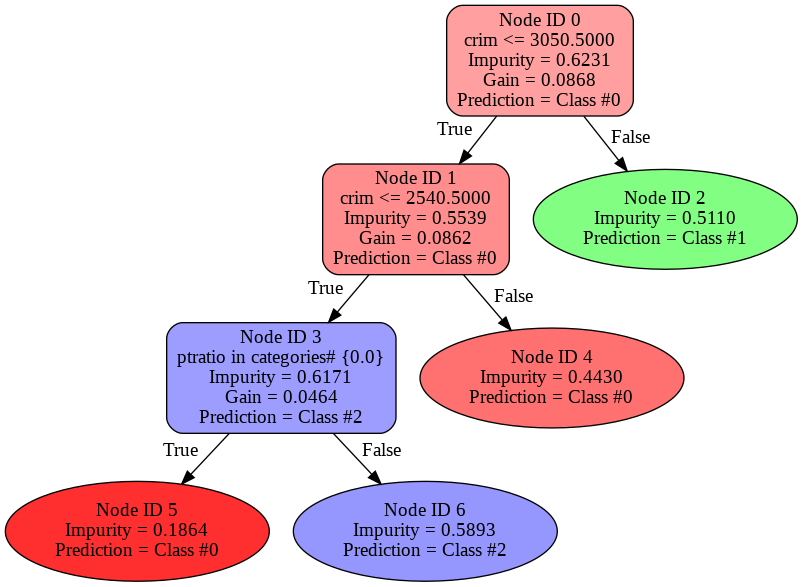

In [0]:
from IPython.display import Image

Image(plot)